# Chapter 6 Applied Exercises

## Exercise 9

### (a)

In [1]:
library(ISLR)
summary(College)
set.seed(1)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

In [2]:
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [3]:
frac = 0.4
test = sample(nrow(College), round(nrow(College)*frac))
test.X  = College[test, ]
train.X = College[-test, ]
test.Y  = College$Apps[test]
train.Y = College$Apps[-test]

### (b)

In [4]:
lm.fit = lm(Apps ~ ., data=train.X)
summary(lm.fit)


Call:
lm(formula = Apps ~ ., data = train.X)

Residuals:
    Min      1Q  Median      3Q     Max 
-3019.9  -385.6    -7.8   287.7  7333.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.045e+03  4.740e+02  -2.205 0.027958 *  
PrivateYes  -4.399e+02  1.600e+02  -2.750 0.006196 ** 
Accept       1.432e+00  6.246e-02  22.920  < 2e-16 ***
Enroll      -9.743e-01  2.349e-01  -4.148 4.02e-05 ***
Top10perc    3.527e+01  6.644e+00   5.308 1.75e-07 ***
Top25perc   -8.631e+00  5.334e+00  -1.618 0.106333    
F.Undergrad  1.361e-01  3.723e-02   3.656 0.000286 ***
P.Undergrad  4.738e-02  3.283e-02   1.443 0.149581    
Outstate    -6.228e-02  2.229e-02  -2.795 0.005417 ** 
Room.Board   8.511e-02  5.602e-02   1.519 0.129347    
Books        1.174e-01  2.695e-01   0.436 0.663372    
Personal     8.716e-03  7.509e-02   0.116 0.907639    
PhD         -8.456e+00  5.319e+00  -1.590 0.112614    
Terminal    -2.256e+00  5.606e+00  -0.402 0.687618    
S.F.Ratio    3.396e+

In [5]:
mean((College$Apps-predict(lm.fit, College))[test]^2)

[1] 1523846

### (c)

In [6]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [7]:
grid = 10^seq(10, -2, length=100)
x = model.matrix(Apps~., College)[,-1]
y = College$Apps
ridge.mod = glmnet(x[-test,], y[-test], alpha=0, lambda=grid, thresh=1e-12)
cv.out = cv.glmnet(x[-test,], y[-test], alpha=0)
bestlam = cv.out$lambda.min
bestlam

[1] 340.006

In [8]:
ridge.pred=predict(ridge.mod, s=bestlam, newx=x[test, ])
mean((ridge.pred - y[test])^2)

[1] 2529110

### (d)

In [9]:
lasso.mod = glmnet(x[-test,], y[-test], alpha=1, lambda=grid)
cv.out = cv.glmnet(x[-test,], y[-test], alpha=1)
bestlam = cv.out$lambda.min
lasso.pred=predict(lasso.mod, s=bestlam, newx=x[test, ])
mean((lasso.pred - y[test])^2)

[1] 1530219

In [10]:
out = glmnet(x, y, alpha=1, lambda=grid)
lasso.coeff=predict(out, type="coefficients", s=bestlam)[1:18,]
lasso.coeff

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-467.68975773 -491.65560764    1.57208772   -0.77597209   48.37507087 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
 -13.03738589    0.04390910    0.04409808   -0.08358415    0.14979823 
        Books      Personal           PhD      Terminal     S.F.Ratio 
   0.01588056    0.02929896   -8.44513420   -3.27260881   14.68037156 
  perc.alumni        Expend     Grad.Rate 
  -0.01722578    0.07724462    8.34348263

### (e)

In [11]:
library(pls)


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [12]:
pcr.fit=pcr(Apps~., data=College[-test,], scale=TRUE, validation="CV")
summary(pcr.fit)

Data: 	X dimension: 466 17 
	Y dimension: 466 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3323     3322     1617     1623     1464     1338     1270
adjCV         3323     3323     1615     1624     1391     1265     1267
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1245     1205     1195      1185      1183      1179      1186
adjCV     1245     1197     1193      1183      1181      1176      1183
       14 comps  15 comps  16 comps  17 comps
CV         1198      1162      1039     984.2
adjCV      1194      1158      1035     980.5

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X     32.6616    57.80    64.80    70.21    75.49    80.67    84.23    87.48
Apps   0.4505    76.59    76.76    83.84    86.01    86.05    86.75    87.7

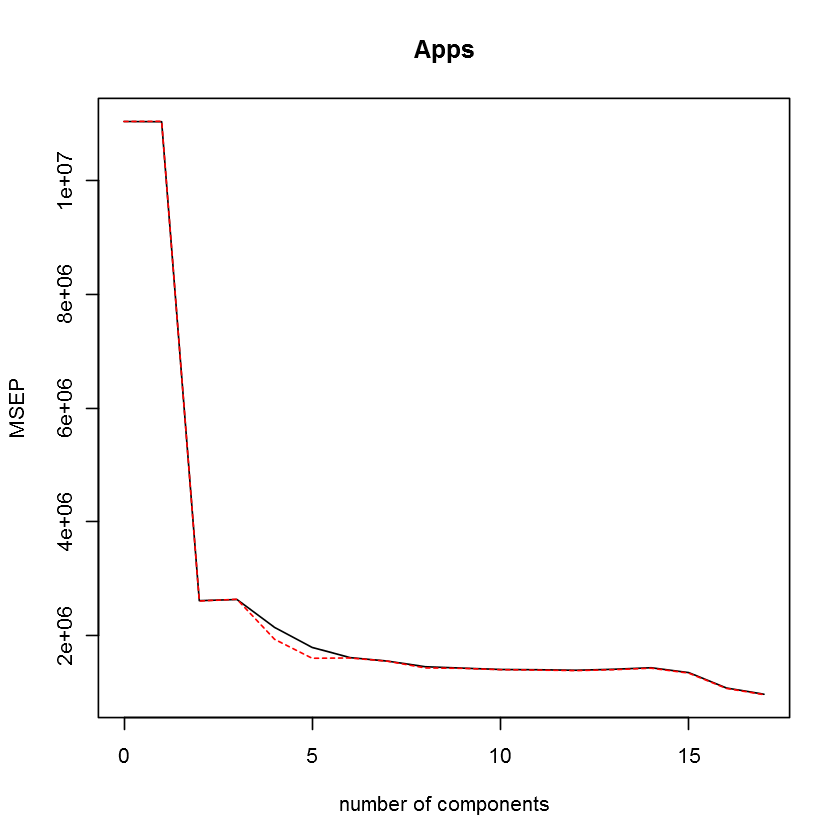

In [13]:
validationplot(pcr.fit, val.type="MSEP")

It seems we need all 17 components

In [14]:
pcr.pred=predict(pcr.fit, x[test, ], ncomp=17)
mean((pcr.pred - y[test])^2)

[1] 1523846

### (f)

In [15]:
pls.fit=plsr(Apps~., data=College[-test,], scale=TRUE, validation="CV")
summary(pls.fit)

Data: 	X dimension: 466 17 
	Y dimension: 466 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3323     1477     1196     1149     1122     1083     1039
adjCV         3323     1475     1190     1146     1116     1078     1032
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1015     1009    994.0     992.7     993.0     994.9     995.0
adjCV     1010     1004    989.8     988.3     988.8     990.5     990.7
       14 comps  15 comps  16 comps  17 comps
CV        994.7     994.4     994.4     994.4
adjCV     990.4     990.1     990.1     990.1

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       25.09    35.48    62.86    66.13    70.14    73.82    76.30    80.29
Apps    80.88    87.73    88.93    90.22    91.24    91.94    92.13    

$M = 13$ gives the lowest cv error

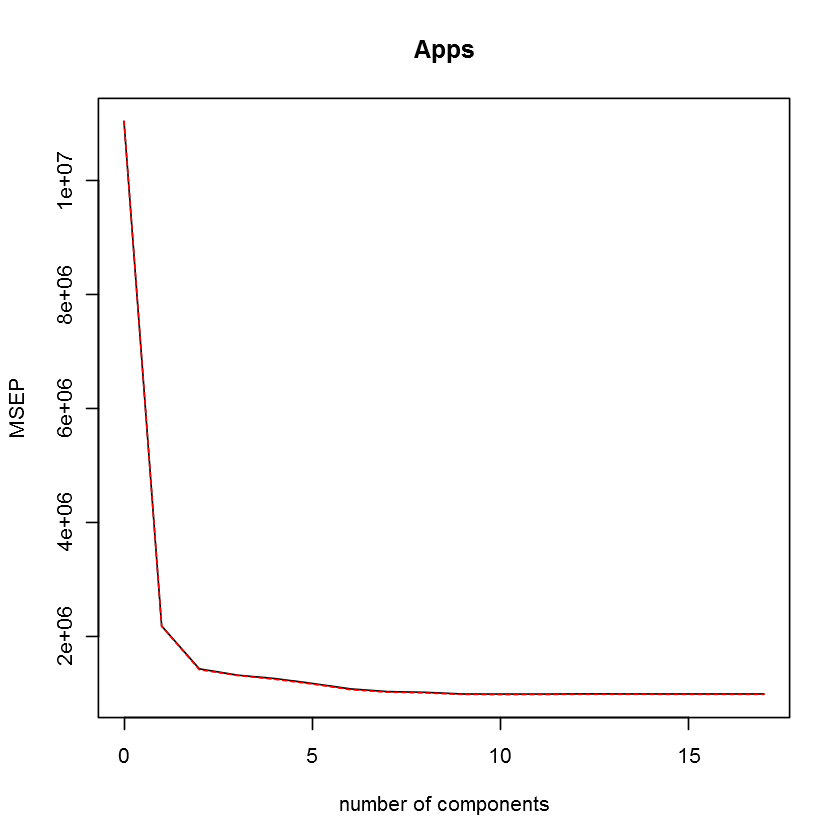

In [16]:
validationplot(pls.fit, val.type="MSEP")

In [17]:
pls.pred=predict(pls.fit, x[test, ], ncomp=17)
mean((pls.pred - y[test])^2)

[1] 1523846

## Exercise 11

### (a)

In [18]:
library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [19]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


#### Ridge Regression

In [20]:
frac = 0.4
test = sample(nrow(Boston), round(nrow(Boston)*frac))
test.X  = Boston[test, ]
train.X = Boston[-test, ]
test.Y  = Boston$crim[test]
train.Y = Boston$crim[-test]

In [21]:
grid = 10^seq(10, -2, length=100)
x = model.matrix(crim~., Boston)[,-1]
y = Boston$crim

In [22]:
ridge.mod = glmnet(x[-test,], y[-test], alpha=0, lambda=grid)
cv.out = cv.glmnet(x[-test,], y[-test], alpha=0)
bestlam = cv.out$lambda.min
ridge.pred=predict(ridge.mod, s=bestlam, newx=x[test, ])
mean((ridge.pred - y[test])^2)

[1] 48.09221

### lasso

In [23]:
lasso.mod = glmnet(x[-test,], y[-test], alpha=1, lambda=grid)
cv.out = cv.glmnet(x[-test,], y[-test], alpha=1)
bestlam = cv.out$lambda.min
lasso.pred=predict(lasso.mod, s=bestlam, newx=x[test, ])
mean((lasso.pred - y[test])^2)

[1] 47.75589

#### PCR

In [24]:
pcr.fit=pcr(crim~., data=Boston[-test,], scale=TRUE, validation="CV")
summary(pcr.fit)

Data: 	X dimension: 304 13 
	Y dimension: 304 1
Fit method: svdpc
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           8.266    6.877    6.860    6.528    6.524    6.551    6.592
adjCV        8.266    6.873    6.857    6.520    6.516    6.542    6.580
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       6.597    6.409    6.438     6.438     6.431     6.364     6.303
adjCV    6.584    6.393    6.422     6.423     6.417     6.349     6.286

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X        48.0    61.27    70.48    77.05    83.27    88.22    91.36    93.62
crim     31.6    32.12    39.96    40.09    40.16    40.40    40.65    44.03
      9 comps  10 comps  11 comps  12 comps  13 comps
X       95.60     97.32     98.53     99.55    100.00
crim    44.18     44.27     

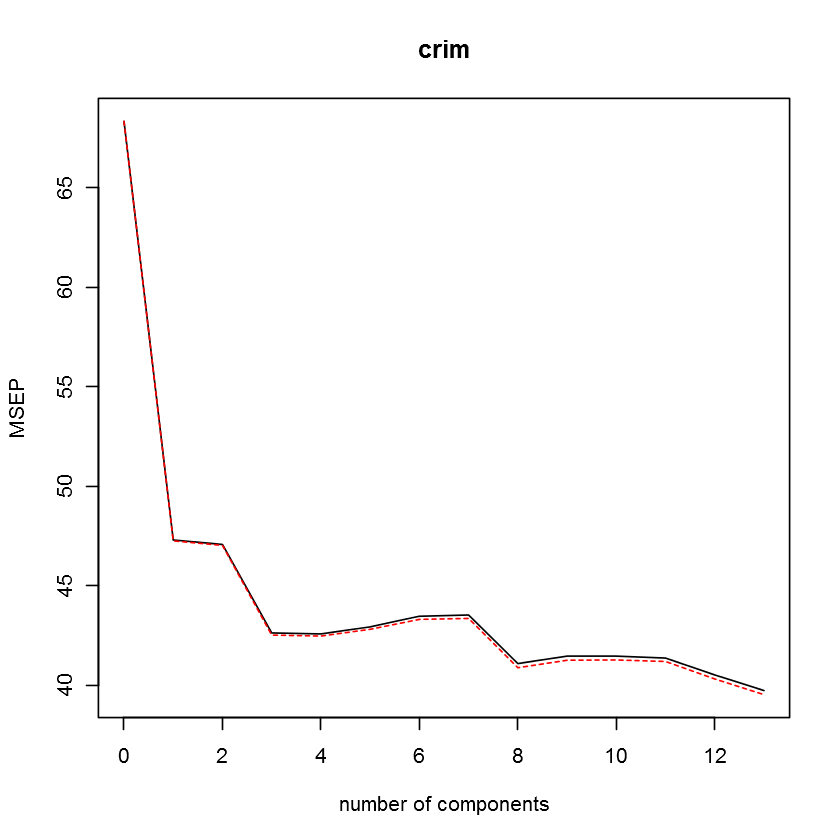

In [25]:
validationplot(pcr.fit, val.type="MSEP")

In [26]:
pcr.pred=predict(pcr.fit, x[test, ], ncomp=4)
mean((pcr.pred - y[test])^2)

[1] 51.21351

### (b)

Choosing the lasso, since it seems to give us the least test error.

In [27]:
out = glmnet(x, y, alpha=1, lambda=grid)
lasso.coeff=predict(out, type="coefficients", s=bestlam)[1:14,]
lasso.coeff

(Intercept)           zn        indus         chas          nox           rm 
11.263822002  0.034205074 -0.061974129 -0.552738687 -5.610577303  0.144796155 
         age          dis          rad          tax      ptratio        black 
 0.000000000 -0.708689618  0.505971143  0.000000000 -0.154057272 -0.007551715 
       lstat         medv 
 0.121792283 -0.144453892